Roll:No:225229106

# PDL Lab3:. Binary Classification of Heart Disease of Patients using Deep Neural Network

### Step:1 Load the data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("heart_data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Step:2 Split the dataset

In [3]:
X=df.drop("target",axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
y=df["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

E:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Step:3 Create a neural network

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### step:4. Compile your model with learning rate = 0.001, optimizer as‘RMSprop’, Mean square error loss and metrics as ‘accuracy’.

In [8]:
from tensorflow import keras
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)

In [9]:
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=30, verbose=1)

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 0.4588 - accuracy: 0.5413
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.5413
Epoch 4/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.5413
Epoch 5/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.5413
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.5413
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.5413
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.5413
Epoch 9/10
9/9 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.5372
Epoch 10/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.5413


In [10]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4427 - accuracy: 0.5574


[0.4427039921283722, 0.5573770403862]

### 5. Print the summary of the model: model.summary()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 6. Train the model for 200 epochs and batch size as 10

In [12]:
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.5413
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.5413
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4600 - accuracy: 0.5372
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.5372
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.5413
Epoch 8/200
25/25 [==============================] - 0s 971us/step - loss: 0.4598 - accuracy: 0.5372
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.5413
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.5413
Epoch 1

Epoch 83/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 0.7893
Epoch 84/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.7934
Epoch 85/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1386 - accuracy: 0.7975
Epoch 86/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.8306
Epoch 87/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.8264
Epoch 88/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1381 - accuracy: 0.8099
Epoch 89/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1295 - accuracy: 0.8264
Epoch 90/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1410 - accuracy: 0.7810
Epoch 91/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.8099
Epoch 92/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1387 - accuracy: 0.7893


25/25 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 0.7934
Epoch 165/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.8264
Epoch 166/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1257 - accuracy: 0.8140
Epoch 167/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1273 - accuracy: 0.8058
Epoch 168/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1265 - accuracy: 0.7975
Epoch 169/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.8223
Epoch 170/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.8223
Epoch 171/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1278 - accuracy: 0.8264
Epoch 172/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1170 - accuracy: 0.8430
Epoch 173/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1262 - accuracy: 0.8264
Epoc

In [13]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.2468 - accuracy: 0.6721


[0.24678143858909607, 0.6721311211585999]

### 7. Save the trained model in a variable, such as, history. Also, you can split your training data for validation such as 20% of training data

In [14]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10,verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 13ms/step - loss: 0.1342 - accuracy: 0.8187 - val_loss: 0.0972 - val_accuracy: 0.8776
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1316 - accuracy: 0.8290 - val_loss: 0.1609 - val_accuracy: 0.7755
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1364 - accuracy: 0.8135 - val_loss: 0.0972 - val_accuracy: 0.8980
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1307 - accuracy: 0.8187 - val_loss: 0.1052 - val_accuracy: 0.8163
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1314 - accuracy: 0.8135 - val_loss: 0.1212 - val_accuracy: 0.8163
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1314 - accuracy: 0.8238 - val_loss: 0.1029 - val_accuracy: 0.8367
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1239 - accuracy: 0.8394 - val_loss: 0.1179 - val_accuracy: 0.8367
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1254 - accuracy: 0.8290 - val_loss: 0.1036 - val_accuracy: 0.8571
Epoch 60/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1241 - accuracy: 0.8290 - val_loss: 0.1529 - val_accuracy: 0.7959
Epoch 61/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1217 - accuracy: 0.8135 - val_loss: 0.1074 - val_accuracy: 0.8367
Epoch 62/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1286 - accuracy: 0.8187 - val_loss: 0.1066 - val_accuracy: 0.8367
Epoch 63/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1240 - accuracy: 0.8446 - val_loss: 0.1178 - val_accuracy: 0.8163
Epoch 64/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1249 - accuracy: 0.8238 - val_loss: 0.1492 - val_accuracy: 0.7959
Epoch 65/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1301 - accuracy: 0.8238 - val_loss: 0.1060 - val_accuracy: 0.8367
Epoch 

### 8. Evaluate the trained model to predict the probability values for thetest data set (ie., xtest and ytest)

In [15]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.1660 - accuracy: 0.7541


[0.16599944233894348, 0.7540983557701111]

### 9. Print the model accuracy and model loss as below (Use can use the ‘history’ object we have saved). Sample code is given below.

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
import matplotlib.pyplot as plt

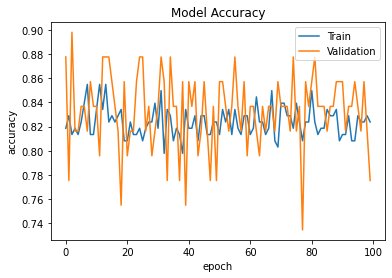

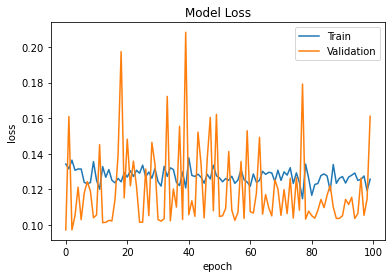

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# 10. Do further experiments

In [21]:
model1 = Sequential()
model1.add(Dense(16, input_dim=13, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [23]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                224       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history1 = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10,verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1255 - accuracy: 0.8135 - val_loss: 0.1276 - val_accuracy: 0.8163
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1322 - accuracy: 0.8135 - val_loss: 0.1129 - val_accuracy: 0.8163
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1213 - accuracy: 0.8446 - val_loss: 0.1139 - val_accuracy: 0.8163
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1264 - accuracy: 0.8342 - val_loss: 0.1073 - val_accuracy: 0.8367
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1254 - accuracy: 0.8238 - val_loss: 0.1211 - val_accuracy: 0.8163
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1256 - accuracy: 0.8446 - val_loss: 0.1415 - val_accuracy: 0.8163
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1286 - accuracy: 0.8290 - val_loss: 0.1062 - val_accuracy: 0.8367
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1271 - accuracy: 0.8549 - val_loss: 0.1163 - val_accuracy: 0.8163
Epoch 60/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1206 - accuracy: 0.8290 - val_loss: 0.1041 - val_accuracy: 0.8776
Epoch 61/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1214 - accuracy: 0.8446 - val_loss: 0.1080 - val_accuracy: 0.8367
Epoch 62/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1275 - accuracy: 0.8342 - val_loss: 0.1384 - val_accuracy: 0.8163
Epoch 63/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1202 - accuracy: 0.8549 - val_loss: 0.1113 - val_accuracy: 0.8367
Epoch 64/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1242 - accuracy: 0.8238 - val_loss: 0.1110 - val_accuracy: 0.8367
Epoch 65/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1213 - accuracy: 0.8238 - val_loss: 0.1058 - val_accuracy: 0.8571
Epoch 

In [25]:
ls = history1.history

In [26]:
new = pd.DataFrame.from_dict(ls)
new

,loss,accuracy,val_loss,val_accuracy
0,0.125467,0.813471,0.127629,0.816327
1,0.132153,0.813471,0.112873,0.816327
2,0.121310,0.844560,0.113900,0.816327
3,0.126394,0.834197,0.107299,0.836735
4,0.125430,0.823834,0.121117,0.816327
...,...,...,...,...
95,0.122063,0.834197,0.137435,0.816327
96,0.118057,0.849741,0.137163,0.816327
97,0.123075,0.808290,0.121861,0.857143
98,0.129216,0.797927,0.122115,0.857143


In [29]:
model2 = Sequential()
model2.add(Dense(32, input_dim=13, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [30]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                448       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model3 = Sequential()
model3.add(Dense(64, input_dim=13, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [33]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                896       
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3649 (14.25 KB)
Trainable params: 3649 (14.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
